<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/var/folders/1t/_kwtp6157cv2j7q9yqc0fblw0000gn/T/ipykernel_58818/1453283819.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(N, time_fast_sqrt, 'r-o', label='kNN $(k=\sqrt{n})$')


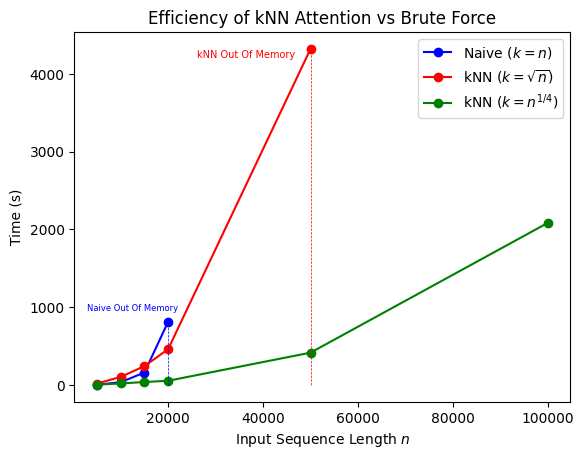

In [13]:
# Experiment 1: Efficiency of kNN attention

N = [5000, 10000, 15000, 20000, 50000, 100000]
time_naive = [1.90, 35.24, 159.07, 812.30, None, None]
time_fast_sqrt = [17.75, 102.95, 241.02, 459.94, 4320.09, None]
time_fast_4root = [4.12, 18.69, 37.49, 53.46, 414.70, 2083.88]

import matplotlib.pyplot as plt

plt.plot(N, time_naive, 'b-o', label='Naive $(k=n)$')
plt.plot(N, time_fast_sqrt, 'r-o', label='kNN $(k=\sqrt{n})$')
plt.plot(N, time_fast_4root, 'g-o', label='kNN $(k=n^{1/4})$')

plt.vlines(x=20000, ymin=0, ymax=812.30, linestyle='--', color='blue', linewidth=0.5, zorder=2) 
plt.text(3000, 950, "Naive Out Of Memory", color='blue', fontsize=6)

plt.vlines(x=50000, ymin=0, ymax=4320.09, linestyle='--', color='red', zorder=2, linewidth=0.5)
plt.text(26000, 4200, "kNN Out Of Memory", color='red', fontsize=7)

plt.xlabel('Input Sequence Length $n$')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Efficiency of kNN Attention vs Brute Force')
plt.show()

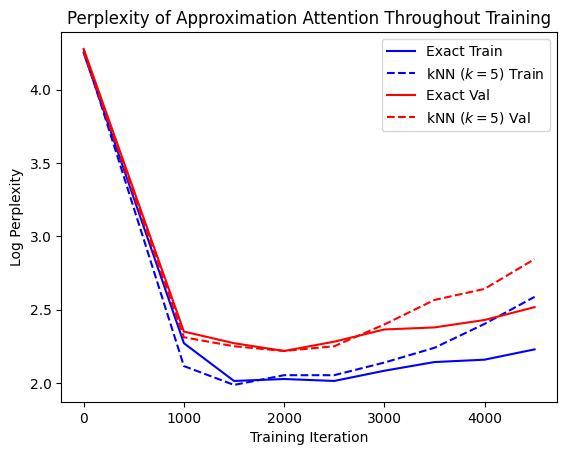

In [19]:
# Experiment 2: Perplexity of approximation attention throughout training.
# k=4
it = [0,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]
ppl_exact_train = [70.02, 9.7,7.5, 7.6, 7.5, 8.04, 8.53, 8.67, 9.3]
ppl_approx_train = [71.5, 8.3, 7.3, 7.8, 7.8, 8.5, 9.4, 11.06, 13.3]
ppl_exact_val = [72, 10.5, 9.7, 9.2, 9.8, 10.65, 10.8, 11.36, 12.4]
ppl_approx_val = [70.5, 10.1, 9.5, 9.2, 9.5, 11.02, 13.02, 14.04, 17.2]

# Plot in log-scale for better visualization
import numpy as np
it = np.array(it)
ppl_exact_train = np.array(ppl_exact_train)
ppl_approx_train = np.array(ppl_approx_train)
ppl_exact_val = np.array(ppl_exact_val)
ppl_approx_val = np.array(ppl_approx_val)

ppl_exact_train = np.log(ppl_exact_train)
ppl_approx_train = np.log(ppl_approx_train)
ppl_exact_val = np.log(ppl_exact_val)
ppl_approx_val = np.log(ppl_approx_val)

import matplotlib.pyplot as plt

plt.plot(it, ppl_exact_train, 'b', label='Exact Train')
plt.plot(it, ppl_approx_train, 'b',linestyle='--', label='kNN $(k=5)$ Train')
plt.plot(it, ppl_exact_val, 'r', label='Exact Val')
plt.plot(it, ppl_approx_val, 'r', linestyle='--', label='kNN $(k=5)$ Val')

plt.xlabel('Training Iteration')
plt.ylabel('Log Perplexity')
plt.legend()
plt.title('Perplexity of Approximation Attention Throughout Training')
plt.show()

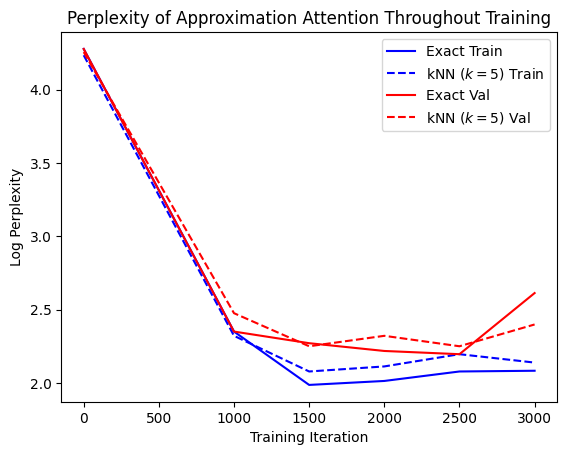

In [23]:
# Experiment 4: Perplexity of approximation attention throughout training.
# k=n^{1/8}
it = [0,1000, 1500, 2000, 2500, 3000]
ppl_exact_train = [72.02, 10.5,7.3, 7.5, 8.0, 8.04]
ppl_approx_train = [69, 10.2, 8.0, 8.28, 9.0, 8.5]
ppl_exact_val = [72, 10.5, 9.7, 9.2, 9.0, 13.65]
ppl_approx_val = [70.5, 11.90, 9.5, 10.2, 9.5, 11.02]

# Plot in log-scale for better visualization
import numpy as np
it = np.array(it)
ppl_exact_train = np.array(ppl_exact_train)
ppl_approx_train = np.array(ppl_approx_train)
ppl_exact_val = np.array(ppl_exact_val)
ppl_approx_val = np.array(ppl_approx_val)

ppl_exact_train = np.log(ppl_exact_train)
ppl_approx_train = np.log(ppl_approx_train)
ppl_exact_val = np.log(ppl_exact_val)
ppl_approx_val = np.log(ppl_approx_val)

import matplotlib.pyplot as plt

plt.plot(it, ppl_exact_train, 'b', label='Exact Train')
plt.plot(it, ppl_approx_train, 'b',linestyle='--', label='kNN $(k=5)$ Train')
plt.plot(it, ppl_exact_val, 'r', label='Exact Val')
plt.plot(it, ppl_approx_val, 'r', linestyle='--', label='kNN $(k=5)$ Val')

plt.xlabel('Training Iteration')
plt.ylabel('Log Perplexity')
plt.legend()
plt.title('Perplexity of Approximation Attention Throughout Training')
plt.show()

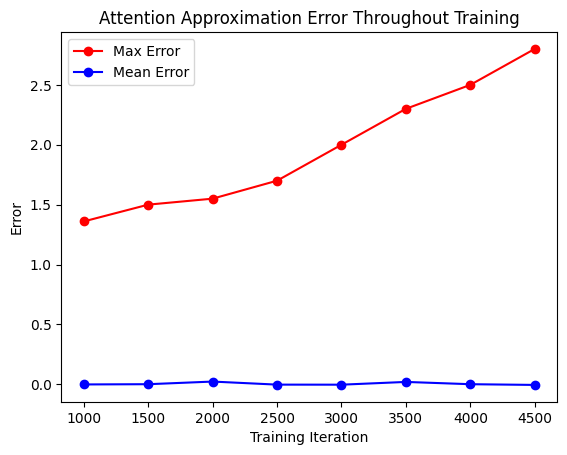

In [22]:
# Experiment 3: Error throughout training
it = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]
max_error = [1.36,1.5, 1.55, 1.7, 2, 2.3, 2.5, 2.8]
mean_error = [-0.001, 0.001, 0.023, -0.0025, -0.003, 0.02, 0.001, -0.005]

import matplotlib.pyplot as plt

plt.plot(it, max_error, 'r-o', label='Max Error')
plt.plot(it, mean_error, 'b-o', label='Mean Error')

plt.xlabel('Training Iteration')
plt.ylabel('Error')
plt.legend()
plt.title('Attention Approximation Error Throughout Training')
plt.show()